# **Práctica   8  Periodograma y Transformada discreta de fourier**

**Carrera:** Licenciatura en Ciencia de Datos

**Grupo:**  6AV1

**Materia:** Análisis de Series de Tiempo

**Docente:** Daniel Jiménez Alcantar

**Alumno:**  
* Jiménez Flores Luis Arturo

Fecha de última modificación: 13/06/2025

En esta práctica analziaremos el periodograma y la transformada discreta de fourier para analizar series de tiempo. Para esta práctica se hará uso de la metodología Box-Jenkins. La cual consta de 4 fases:


*   Identificar el Modelo
*   Estimación de Parámetros
*   Validación
*   Uso del Modelo





Comportamiento de los datos:

pib_mx, export, import: Son variables REALES, medidas en millones de pesos constantes de un año base.

pib_usa: Es una variable REAL, medida en miles de millones (billones) de dólares constantes de un año base.

deflactor: Es un índice de precios que, para este análisis, DEBE SER IGNORADO, ya que las variables principales ya son reales.

# Análisis Univariado

Proceso para dicho análisis:

Metodología Box-Jenkins / ARIMA

¿Para qué sirve? Para entender la estructura de una sola serie temporal y pronosticar su futuro basándose únicamente en sus valores pasados.

Pregunta que responde: "Considerando solo el comportamiento histórico del crecimiento de México, ¿cuál es el pronóstico para el próximo trimestre?"

¿Se debe hacer dicho análisis para todas las variables? Sería útil si se quisiera tener un modelo de pronóstico individual para cada variable, pero no diría nada ada sobre cómo se afectan entre sí.

## Importe de bibliotecas y del conjunto de datos

In [ ]:
# Instalar la librería openpyxl
!pip install openpyxl

In [ ]:
# Instalar la librería fsspec
!pip install fsspec

In [ ]:
# Importar las librerías necesarias

# Para el análisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Importa la biblioteca warnings, utilizada para gestionar los mensajes de advertencia que aparecen durante la ejecución del código.
import warnings
# Configura las advertencias para que se ignoren, de manera que no se muestren en la salida.
warnings.filterwarnings('ignore')

# Para series de tiempo

# Identificación
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.signal import find_peaks

#Aplicación de periodogramas y transformada discreta de fourier
from scipy.signal import periodogram
from scipy.fft import fft, ifft, fftfreq

# Modelos
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
# Cargar los datos desde un archivo Excel
# df_entrada = pd.read_excel('C://Users//ludwi//Desktop//Datos//politica_comercial.xlsx')
df_entrada = pd.read_excel('C://Users//ARTUROJF//Desktop//Datos//politica_comercial.xlsx')

In [ ]:
# Nombre que quieres para tu archivo CSV de salida
df_salida = 'ArchivoBase.csv'

# Conversión a csv
df_entrada.to_csv(df_salida, index=False, encoding='utf-8')

## Análisis Exploratorio de los datos

In [ ]:
df_entrada.head(10)

,periodo,pib_mx,export,import,deflactor,tcn,pib_usa
0,1993-01-01,13800422.22,1782610.03,2073485.82,11.564787,3.105267,10576.275
1,1993-04-01,13803814.43,1779169.28,2161980.95,11.844350,3.113633,10637.847
2,1993-07-01,13964777.19,1826118.00,2208437.75,11.990366,3.116333,10688.606
3,1993-10-01,14052691.98,1937013.00,2313888.41,12.137349,3.125600,10833.987
4,1994-01-01,14191597.23,1925230.83,2463939.92,12.412881,3.171667,10939.116
5,1994-04-01,14515785.03,1972085.50,2565911.07,12.721653,3.342600,11087.361
6,1994-07-01,14596864.59,2044840.14,2621303.05,12.962410,3.394467,11152.176
7,1994-10-01,14754320.27,2096742.42,2684584.55,13.399610,3.622067,11279.932
8,1995-01-01,14075819.37,2526844.29,2044727.00,15.139769,5.994133,11319.951
9,1995-04-01,13226005.31,2427914.88,2103634.57,17.734851,6.151233,11353.721


In [ ]:
df_politica = df_entrada

In [ ]:
df_politica.shape

(128, 7)

In [ ]:
df_politica.columns.values

array(['periodo', 'pib_mx', 'export', 'import', 'deflactor', 'tcn',
       'pib_usa'], dtype=object)

In [ ]:
df_politica.dtypes

periodo      datetime64[ns]
pib_mx              float64
export              float64
import              float64
deflactor           float64
tcn                 float64
pib_usa             float64
dtype: object

In [ ]:
# Mover la columna 'periodo' para que sea el índice del DataFrame.
# El argumento 'inplace=True' modifica el DataFrame directamente, por lo que no necesitas reasignarlo.
print("Estableciendo la columna 'periodo' como el índice del DataFrame...")
df_politica.set_index('periodo', inplace=True)

# Opcional: ¡Verifica el cambio! Corre .info() de nuevo.
print("\nVerificando la nueva estructura del DataFrame:")
df_politica.info()

Estableciendo la columna 'periodo' como el índice del DataFrame...

Verificando la nueva estructura del DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 1993-01-01 to 2024-10-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pib_mx     128 non-null    float64
 1   export     128 non-null    float64
 2   import     128 non-null    float64
 3   deflactor  128 non-null    float64
 4   tcn        128 non-null    float64
 5   pib_usa    128 non-null    float64
dtypes: float64(6)
memory usage: 7.0 KB


In [ ]:
df_politica.head(10)

,pib_mx,export,import,deflactor,tcn,pib_usa
periodo,,,,,,
1993-01-01,13800422.22,1782610.03,2073485.82,11.564787,3.105267,10576.275
1993-04-01,13803814.43,1779169.28,2161980.95,11.844350,3.113633,10637.847
1993-07-01,13964777.19,1826118.00,2208437.75,11.990366,3.116333,10688.606
1993-10-01,14052691.98,1937013.00,2313888.41,12.137349,3.125600,10833.987
1994-01-01,14191597.23,1925230.83,2463939.92,12.412881,3.171667,10939.116
1994-04-01,14515785.03,1972085.50,2565911.07,12.721653,3.342600,11087.361
1994-07-01,14596864.59,2044840.14,2621303.05,12.962410,3.394467,11152.176
1994-10-01,14754320.27,2096742.42,2684584.55,13.399610,3.622067,11279.932
1995-01-01,14075819.37,2526844.29,2044727.00,15.139769,5.994133,11319.951


In [ ]:
ConteoNulos = df_politica.isnull().sum() # Esta línea cuenta cuántos valores faltantes (nulos) hay en cada columna de tu DataFrame
ConteoNulos = ConteoNulos[ConteoNulos != 0] # Esta línea modifica la variable "ConteoNulos" para que solo muestre las columnas que realmente tienen valores faltantes.
porcentaje_nulos_calculado = df_politica.isnull().mean() * 100
porcentaje_nulos_calculado = porcentaje_nulos_calculado[porcentaje_nulos_calculado != 0]

if ConteoNulos.empty:
    # Si ConteoNulos_filtrado está vacío, significa que ninguna columna tiene nulos.
    print("No hay valores nulos en el DataFrame después del tratamiento.")
else:
    # Si hay nulos, procede a calcular porcentajes y crear el DataFrame para mostrar.
    print("Las columnas que presentan datos nulos son las siguientes:\n", sep='')

    # Creas el DataFrame (que llamaste Diccionario_Nulos)
    Diccionario_Nulos = pd.DataFrame({
        'Conteo': ConteoNulos,
        'Porcentaje (%)': porcentaje_nulos_calculado
    })
    print(Diccionario_Nulos)

No hay valores nulos en el DataFrame después del tratamiento.


In [ ]:
df_politica.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 1993-01-01 to 2024-10-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pib_mx     128 non-null    float64
 1   export     128 non-null    float64
 2   import     128 non-null    float64
 3   deflactor  128 non-null    float64
 4   tcn        128 non-null    float64
 5   pib_usa    128 non-null    float64
dtypes: float64(6)
memory usage: 7.0 KB


In [ ]:
df_politica.describe()

,pib_mx,export,import,deflactor,tcn,pib_usa
count,1.280000e+02,1.280000e+02,1.280000e+02,128.000000,128.000000,128.000000
mean,1.995488e+07,6.113963e+06,6.668198e+06,66.723483,12.789908,16716.567758
std,3.434513e+06,2.584534e+06,2.767410e+06,34.084892,4.910913,3466.559261
min,1.322601e+07,1.779169e+06,2.044727e+06,11.564787,3.105267,10576.275000
25%,1.770210e+07,4.259244e+06,4.834021e+06,41.095961,9.474833,14206.667000
50%,2.014867e+07,5.464463e+06,6.641537e+06,64.883256,11.900833,16728.238000
75%,2.309912e+07,8.619922e+06,8.875224e+06,92.362208,17.593917,19224.541500
max,2.556910e+07,1.076406e+07,1.176880e+07,137.236371,23.337233,23542.349000


## Econometría

In [ ]:
# Asignamos las columnas originales, asumiendo que ya son reales.
# Esto aplica probablemente también a exportaciones e importaciones.
print("Asignando variables reales (SIN deflactar)...")
df_politica['pib_mx_real'] = df_politica['pib_mx']
df_politica['export_real'] = df_politica['export']
df_politica['import_real'] = df_politica['import']
# El PIB de USA ya era real.
df_politica['pib_usa_real'] = df_politica['pib_usa']

Asignando variables reales (SIN deflactar)...


PIB de México (pib_mx): Está en Millones de Pesos Mexicanos (MXN) a precios corrientes (nominales).

PIB de USA (pib_usa): Está en Miles de Millones de Dólares Estadounidenses (USD), muy probablemente a precios constantes (reales) de un año base (ej. "Billions of Chained 2017 Dollars").

Debido a esto, se va a seleccionar un tipo de cambio base para manejar los datos de homogénea para evitar sesgos. Esta base será millones de dólares.

Variables a Convertir de Pesos a Dólares:

* pib_mx (o mejor, su versión real, pib_mx_real)

* export (su versión real, export_real)

* import (su versión real, import_real)

Variable a Ajustar Unidades (de Billones a Millones de USD):

* pib_usa (su versión real, pib_usa_real)

Variables que NO se Convierten:

* tcn (Tipo de Cambio Nominal): Esta es tu herramienta de conversión. No debes

* convertirla; debes usarla para convertir las otras.


La Lógica de la Conversión

De Pesos a Dólares: Para convertir una cantidad de pesos a dólares, tienes que dividirla por el número de pesos que cuesta un dólar. La fórmula es:

$$\text{Valor en Dólares} = \frac{\text{Valor en Pesos}}{\text{Tipo de Cambio (tcn)}}$$

Usaremos las variables reales que ya calculamos para obtener una comparación más significativa.

In [ ]:
# --- Convertir las variables de México de Pesos Reales a Dólares ---
# La unidad resultante será "Millones de Dólares" porque (Millones de MXN) / (MXN por USD) = Millones de USD.
df_politica['pib_mx_usd'] = df_politica['pib_mx_real'] / df_politica['tcn']
df_politica['export_usd'] = df_politica['export_real'] / df_politica['tcn']
df_politica['import_usd'] = df_politica['import_real'] / df_politica['tcn']

De Billones a Millones de Dólares: Para esto se debe saber que 1 billón = 1,000 millones. Por lo tanto, para convertir el PIB de USA de miles de millones (billones) a millones, simplemente lo multiplicamos por 1,000.

$$ \text{Valor en Millones}= \text{Valor en Billones} ×1000 $$

In [ ]:
# --- Ajustar las unidades del PIB de USA ---
# La unidad original es "Billones de USD", la convertimos a "Millones de USD".
df_politica['pib_usa_usd'] = df_politica['pib_usa_real'] * 1000

# --- 5c. Inspeccionar los resultados ---
# Seleccionamos las nuevas columnas en USD para ver el resultado.
columnas_usd = ['pib_mx_usd', 'export_usd', 'import_usd', 'pib_usa_usd']
print("\nDataFrame con las nuevas columnas en Millones de Dólares (USD):")
print(df_politica[columnas_usd].head())


DataFrame con las nuevas columnas en Millones de Dólares (USD):
              pib_mx_usd     export_usd     import_usd  pib_usa_usd
periodo                                                            
1993-01-01  4.444199e+06  574060.208463  667731.967196   10576275.0
1993-04-01  4.433346e+06  571412.587652  694359.521031   10637847.0
1993-07-01  4.481156e+06  585982.885870  708665.445502   10688606.0
1993-10-01  4.495998e+06  619725.172767  740302.153187   10833987.0
1994-01-01  4.474492e+06  607009.194955  776859.669995   10939116.0


Se aplica el logaritmo debido a que al hacer esto. Convierte los datos a tasas de crecimiento porcentual, estabiliza la varianza y lineariza las relaciones, preparando los datos para un modelado estadístico válido. A este proceso se le conoce como elasticidad.

In [ ]:
# --- APLICAR LA TRANSFORMACIÓN LOGARÍTMICA A LAS VARIABLES EN USD ---
print("Aplicando transformación logarítmica a las variables en USD...")

df_politica['log_pib_mx_usd'] = np.log(df_politica['pib_mx_usd'])
df_politica['log_pib_usa_usd'] = np.log(df_politica['pib_usa_usd'])
df_politica['log_export_usd'] = np.log(df_politica['export_usd'])
df_politica['log_import_usd'] = np.log(df_politica['import_usd'])

# El tipo de cambio (tcn) no se convierte, pero sí se suele usar su logaritmo en los modelos.
df_politica['log_tcn'] = np.log(df_politica['tcn'])

Aplicando transformación logarítmica a las variables en USD...


In [ ]:
# CÁLCULO DE TASAS DE CRECIMIENTO (PARA ESTACIONARIEDAD)
# ---------------------------------------------------------------------------
print("Calculando tasas de crecimiento...")
df_politica['crecimiento_pib_mx_usd'] = df_politica['log_pib_mx_usd'].diff()
df_politica['crecimiento_pib_usa_usd'] = df_politica['log_pib_usa_usd'].diff()
df_politica['crecimiento_export_usd'] = df_politica['log_export_usd'].diff()
df_politica['crecimiento_import_usd'] = df_politica['log_import_usd'].diff()
df_politica['variacion_tcn'] = df_politica['log_tcn'].diff()

Calculando tasas de crecimiento...


In [ ]:
# --- Verificación Final ---
print("\n¡Proceso completado! DataFrame listo para el análisis.")
print("Últimas filas del DataFrame final:")
print(df_politica.tail())


¡Proceso completado! DataFrame listo para el análisis.
Últimas filas del DataFrame final:
                 pib_mx       export       import   deflactor        tcn  \
periodo                                                                    
2023-10-01  25272662.02   9372085.24  11180145.37  130.050781  17.557933   
2024-01-01  25264616.11   9462510.70  11400486.44  130.139883  16.997433   
2024-04-01  25337212.62   9604575.26  11459276.52  132.104993  17.245933   
2024-07-01  25569100.57  10180806.19  11628061.21  134.561019  18.944033   
2024-10-01  25407548.99  10550708.06  11768804.48  137.236371  20.087467   

              pib_usa  pib_mx_real  export_real  import_real  pib_usa_real  \
periodo                                                                      
2023-10-01  22960.600  25272662.02   9372085.24  11180145.37     22960.600   
2024-01-01  23053.545  25264616.11   9462510.70  11400486.44     23053.545   
2024-04-01  23223.906  25337212.62   9604575.26  11459276.52    

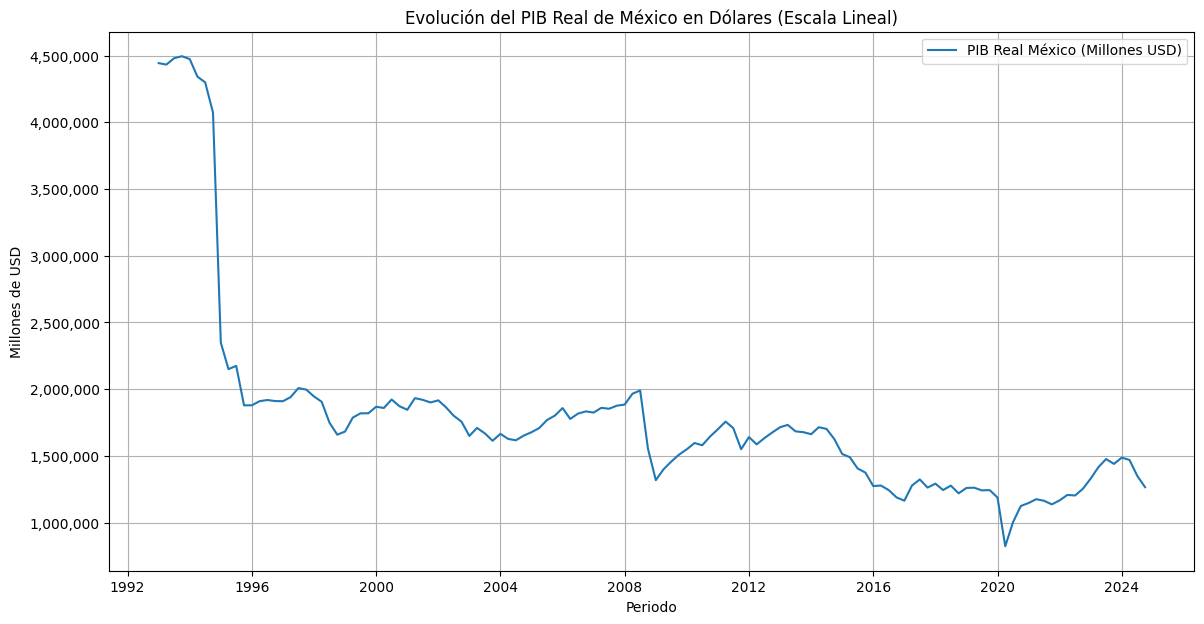

In [ ]:
# --- Graficar la Evolución del PIB de México en Dólares (Escala Lineal) ---

# Crear la figura y los ejes para el gráfico
plt.figure(figsize=(14, 7))

# Graficar únicamente la serie de México en Millones de USD
plt.plot(df_politica.index, df_politica['pib_mx_usd'], label='PIB Real México (Millones USD)')

# Añadir títulos y etiquetas
plt.title('Evolución del PIB Real de México en Dólares (Escala Lineal)')
plt.xlabel('Periodo')
plt.ylabel('Millones de USD')
plt.legend()
plt.grid(True)

# Formatear el eje Y para que los números grandes sean más legibles
from matplotlib.ticker import FuncFormatter
def millions_formatter(x, pos):
    return f'{int(x):,}'
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Mostrar el gráfico
plt.show()

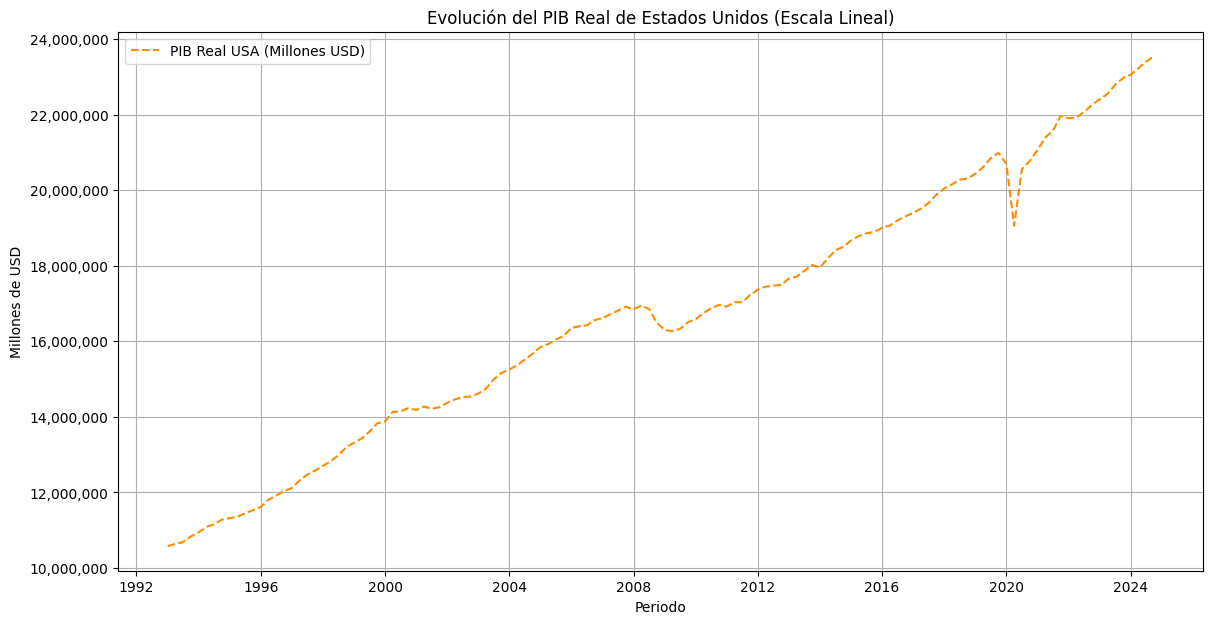

In [ ]:
# --- Graficar la Evolución del PIB de Estados Unidos en Dólares (Escala Lineal) ---

# Crear la figura y los ejes para el gráfico
plt.figure(figsize=(14, 7))

# Graficar únicamente la serie de EE.UU. en Millones de USD
plt.plot(df_politica.index, df_politica['pib_usa_usd'], label='PIB Real USA (Millones USD)', color='darkorange', linestyle='--')

# Añadir títulos y etiquetas
plt.title('Evolución del PIB Real de Estados Unidos (Escala Lineal)')
plt.xlabel('Periodo')
plt.ylabel('Millones de USD')
plt.legend()
plt.grid(True)

# Formatear el eje Y para que los números grandes sean más legibles
from matplotlib.ticker import FuncFormatter
def millions_formatter(x, pos):
    return f'{int(x):,}'
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Mostrar el gráfico
plt.show()

In [ ]:
# Estas son las series estacionarias que se usarán en el modelo.
# También se puede calcular como (Valor_Nuevo - Valor_Viejo) / Valor_Viejo
print("Calculando las tasas de crecimiento desde las variables en logaritmos y USD...")

df_politica['crecimiento_pib_mx_usd'] = df_politica['log_pib_mx_usd'].diff()
df_politica['crecimiento_pib_usa_usd'] = df_politica['log_pib_usa_usd'].diff()
df_politica['crecimiento_export_usd'] = df_politica['log_export_usd'].diff()
df_politica['crecimiento_import_usd'] = df_politica['log_import_usd'].diff()

# La variación del tipo de cambio no se convierte, por lo que su cálculo no cambia.
df_politica['variacion_tcn'] = df_politica['log_tcn'].diff()


Calculando las tasas de crecimiento desde las variables en logaritmos y USD...


Visualizando la evolución del PIB Real (en escala logarítmica)...


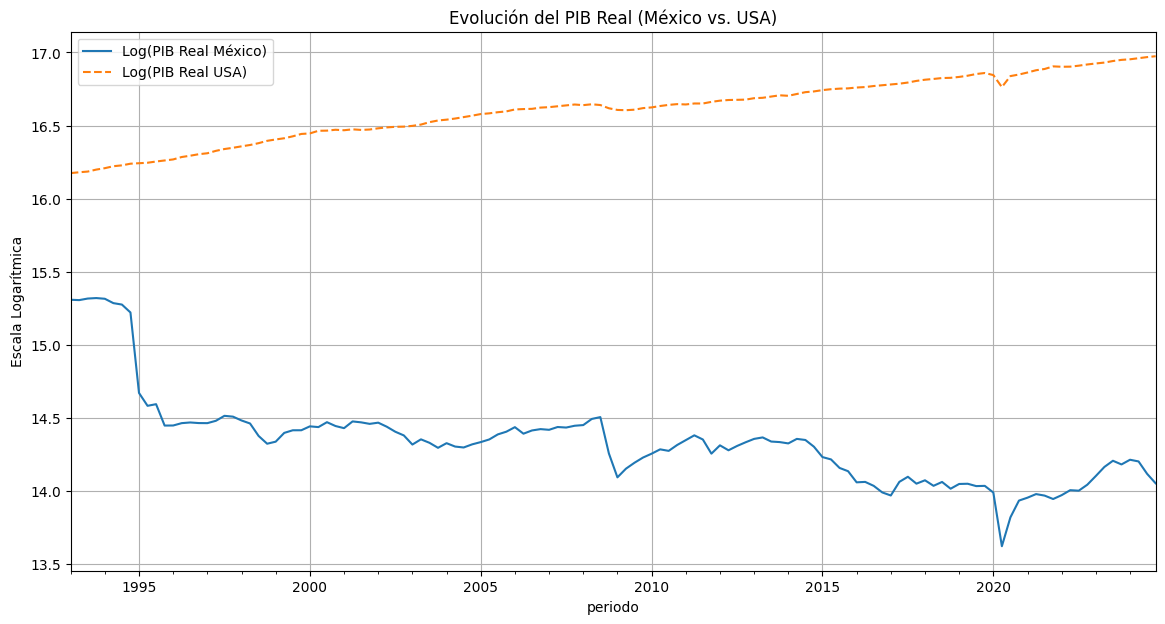

In [ ]:
# --- Visualizar las series transformadas para entender su comportamiento ---
print("Visualizando la evolución del PIB Real (en escala logarítmica)...")
plt.figure(figsize=(14, 7))
df_politica['log_pib_mx_usd'].plot(label='Log(PIB Real México)', legend=True)
df_politica['log_pib_usa_usd'].plot(label='Log(PIB Real USA)', legend=True, linestyle='--')
plt.title('Evolución del PIB Real (México vs. USA)')
plt.ylabel('Escala Logarítmica')
plt.grid(True)
plt.show()

## Análisis Exploratorio de Series de Tiempo

En este proytecto analizaremos dos series.

* La serie log_pib_mx_usd representa el NIVEL de la economía. Es la foto de qué tan grande es la economía en un momento dado. Esta serie tiene tendencia y ciclos.

* La serie crecimiento_pib_mx_usd representa el CAMBIO de la economía. Es la "velocidad" a la que la economía crece o se contrae de un trimestre a otro. Esta serie ya no tiene tendencia (es estacionaria).

Esto debido a que son dos herramientas que se derivan la una de la otra y que se usan en diferentes momentos para responder distintas preguntas y para cumplir con los requisitos de los modelos econométricos.

### Serie de crecimiento

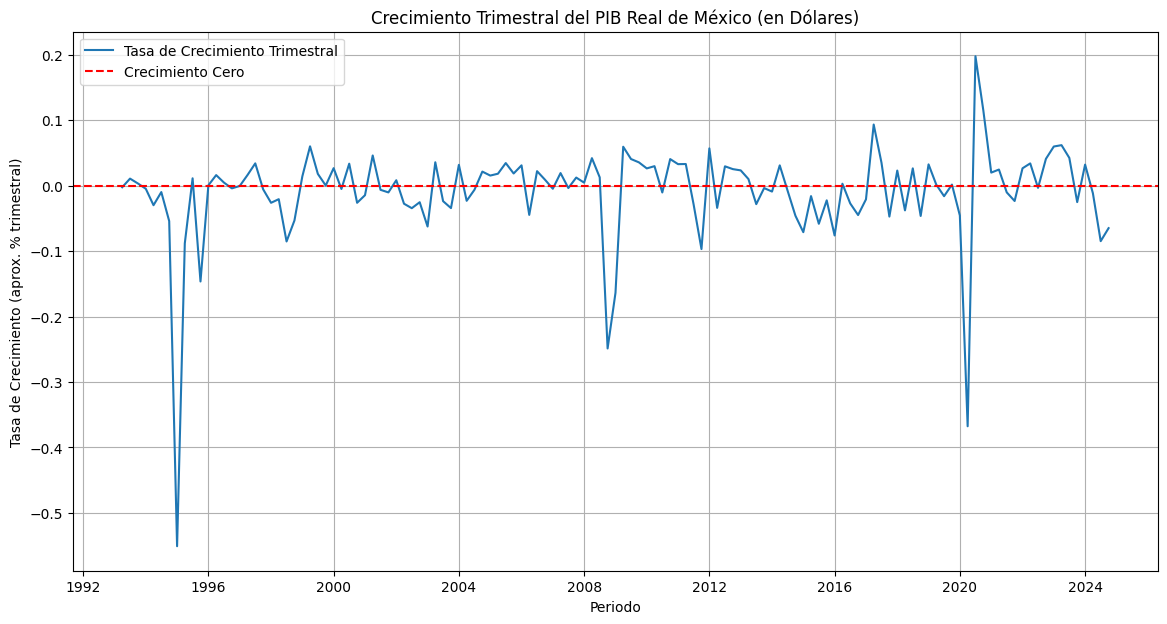

In [ ]:
# --- Graficar la Tasa de Crecimiento Trimestral ---

# Asegurarnos que la serie no tenga valores nulos para graficar
serie_a_graficar = df_politica['crecimiento_pib_mx_usd'].dropna()

# Crear la figura y los ejes para el gráfico
plt.figure(figsize=(14, 7))

# Graficar la serie de crecimiento a lo largo del tiempo
plt.plot(serie_a_graficar.index, serie_a_graficar, label='Tasa de Crecimiento Trimestral')

# Añadir una línea horizontal en cero para distinguir crecimiento de contracción
plt.axhline(y=0, color='r', linestyle='--', linewidth=1.5, label='Crecimiento Cero')

# Añadir títulos y etiquetas para mayor claridad
plt.title('Crecimiento Trimestral del PIB Real de México (en Dólares)')
plt.xlabel('Periodo')
plt.ylabel('Tasa de Crecimiento (aprox. % trimestral)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

#### Estadística Descriptiva Crecimiento

In [ ]:
# --- ANÁLISIS DE ESTADÍSTICA DESCRIPTIVA ---

# Seleccionar la serie y eliminar el valor NaN inicial
# Es crucial usar .dropna() para que los cálculos no se vean afectados.
serie_crecimiento = df_politica['crecimiento_pib_mx_usd'].dropna()

# Calcular las estadísticas descriptivas
print("--- Estadísticas Descriptivas del Crecimiento del PIB de México (en USD) ---")
mean_value = serie_crecimiento.mean()
median_value = serie_crecimiento.median()
# La moda es menos informativa para datos continuos, pero la calculamos por completitud.
mode_value = serie_crecimiento.mode().iloc[0] if not serie_crecimiento.mode().empty else 'N/A'
std_dev = serie_crecimiento.std()
variance = serie_crecimiento.var()
# Calculamos los percentiles para entender los extremos
percentiles = serie_crecimiento.quantile([0.01, 0.05, 0.95, 0.99])

# Presentar los resultados de forma ordenada
stats_results = {
    "Promedio (Media)": mean_value,
    "Mediana": median_value,
    "Moda": mode_value,
    "Desviación Estándar": std_dev,
    "Varianza": variance
}

print("\nEstadísticas básicas:")
# Usamos un bucle para imprimir los resultados formateados
for key, value in stats_results.items():
    # El :.4f formatea el número para que tenga 4 decimales
    print(f"  {key}: {value:.4f}")

print("\nPercentiles extremos:")
print(percentiles)

--- Estadísticas Descriptivas del Crecimiento del PIB de México (en USD) ---

Estadísticas básicas:
  Promedio (Media): -0.0099
  Mediana: 0.0002
  Moda: -0.5508
  Desviación Estándar: 0.0767
  Varianza: 0.0059

Percentiles extremos:
0.01   -0.336669
0.05   -0.087285
0.95    0.058666
0.99    0.109173
Name: crecimiento_pib_mx_usd, dtype: float64


#### Granularidad, Máximos y Mínimos

In [ ]:
# --- ANÁLISIS DE GRANULARIDAD, MÁXIMOS Y MÍNIMOS ---

print("--- Análisis de Granularidad, Máximos y Mínimos ---")

# Análisis de Granularidad
# Verifica la diferencia de días entre cada punto de datos.
# Como tus datos son trimestrales, esperamos ver números alrededor de 90-92 días.
print("\nAnálisis de Granularidad:")
if isinstance(serie_crecimiento.index, pd.DatetimeIndex):
    # Calcula la diferencia en días entre cada fecha del índice
    dias_diferencia = serie_crecimiento.index.to_series().diff().dt.days
    # Cuenta las diferencias más comunes para ver la frecuencia
    conteo_diferencias = dias_diferencia.value_counts().head()

    print("Diferencias más frecuentes en días entre registros:")
    print(conteo_diferencias)
else:
    print("El índice no es de tipo DatetimeIndex, no se puede calcular la granularidad.")

# Máximos y Mínimos globales
print("\nAnálisis de Extremos Globales:")
max_growth_val = serie_crecimiento.max()
max_growth_date = serie_crecimiento.idxmax()
min_growth_val = serie_crecimiento.min()
min_growth_date = serie_crecimiento.idxmin()

# Imprimimos los resultados formateados
print(f"Máximo crecimiento trimestral: {max_growth_val:.4f} (aprox. {max_growth_val:.2%}) el {max_growth_date.strftime('%Y-%m-%d')}")
print(f"Mínimo crecimiento (peor contracción): {min_growth_val:.4f} (aprox. {min_growth_val:.2%}) el {min_growth_date.strftime('%Y-%m-%d')}")

--- Análisis de Granularidad, Máximos y Mínimos ---

Análisis de Granularidad:
Diferencias más frecuentes en días entre registros:
periodo
92.0    63
91.0    40
90.0    23
Name: count, dtype: int64

Análisis de Extremos Globales:
Máximo crecimiento trimestral: 0.1977 (aprox. 19.77%) el 2020-07-01
Mínimo crecimiento (peor contracción): -0.5508 (aprox. -55.08%) el 1995-01-01


Granularidad: Las diferencias más frecuentes son 90, 91 y 92 días.

Confirma que los datos son consistentemente trimestrales.

La Duración de un Trimestre en Días: Como los meses tienen diferente número de días (30, 31, o 28/29), la duración de un trimestre no es constante.

Calculemos:

* Trimestre 1 (Enero, Febrero, Marzo): 31 + 28/29 + 31 = 90 días (o 91 en año bisiesto).

* Trimestre 2 (Abril, Mayo, Junio): 30 + 31 + 30 = 91 días.

* Trimestre 3 (Julio, Agosto, Septiembre): 31 + 31 + 30 = 92 días.

* Trimestre 4 (Octubre, Noviembre, Diciembre): 31 + 30 + 31 = 92 días.

Dando así resultados tales como:
* 92.0 días (63 veces)
* 91.0 días (40 veces)
* 90.0 días (23 veces)

Extremos Globales: Los resultados son históricamente coherentes:

Mínimo (Peor Contracción) en 1995-01-01: Corresponde exactamente al "Efecto Tequila", la crisis más severa de ese periodo.

Máximo Crecimiento en 2020-07-01: Corresponde al masivo rebote económico del tercer trimestre de 2020, justo después del parón inicial por la pandemia.

#### Análisis de Tendencia (Media Móvil)

Como nuestros datos son trimestrales, una ventana de 4 periodos equivaldrá a una media móvil anual (4 trimestres = 1 año).

Generando gráfico de tendencia con media móvil...


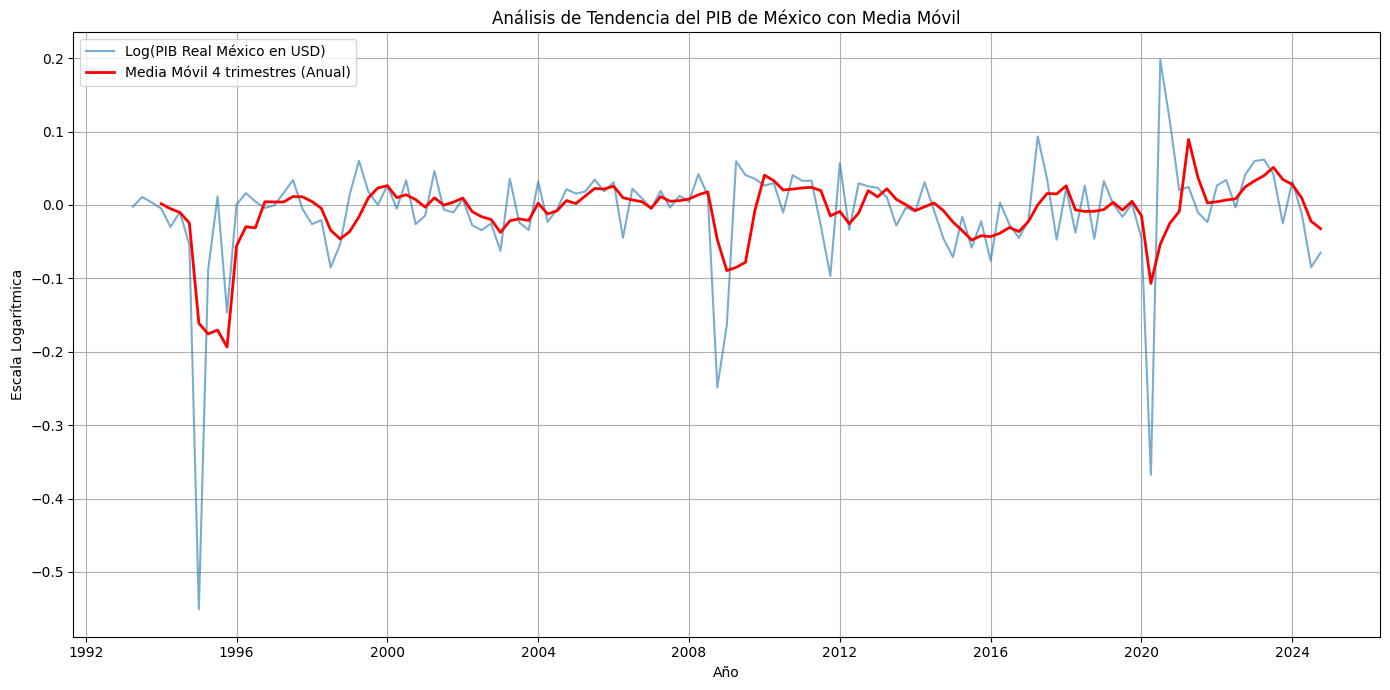

In [ ]:
# --- ANÁLISIS DE TENDENCIA CON MEDIA MÓVIL ANUAL ---

# Definir la ventana móvil
# Usamos 4 porque nuestros datos son trimestrales (4 trimestres = 1 año)
ventana_movil = 4

# Calcular la media móvil
serie_media_movil = serie_crecimiento.rolling(window=ventana_movil).mean()

# Graficar ambas series
print("Generando gráfico de tendencia con media móvil...")
plt.figure(figsize=(14, 7))

# Graficar la serie original con un poco de transparencia
plt.plot(serie_crecimiento.index, serie_crecimiento, alpha=0.6, label='Log(PIB Real México en USD)')

# Graficar la media móvil con una línea más gruesa y de otro color
plt.plot(serie_media_movil.index, serie_media_movil, color='red', linewidth=2, label=f'Media Móvil {ventana_movil} trimestres (Anual)')

# Añadir títulos y etiquetas adecuados
plt.title('Análisis de Tendencia del PIB de México con Media Móvil')
plt.xlabel('Año')
plt.ylabel('Escala Logarítmica')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Línea Azul (semitransparente): Es tu serie original log_pib_mx_usd, con toda su volatilidad y ruido trimestre a trimestre.

Línea Roja (gruesa): Es la versión "suavizada" de la serie. Esta línea es mucho más útil para ver la tendencia fundamental de la economía a lo largo del tiempo, ya que promedia las fluctuaciones de corto plazo.

Con la línea roja se puede identificar mucho más fácilmente los grandes ciclos económicos tales como: la caída post-1995, su la recuperación y caída hasta 2008, el estancamiento posterior y los efectos de la pandemia, sin la distracción del "ruido" trimestral.

#### Picos y Valles Locales (Exploratorio)

Generando gráfico de picos y valles del ciclo económico...


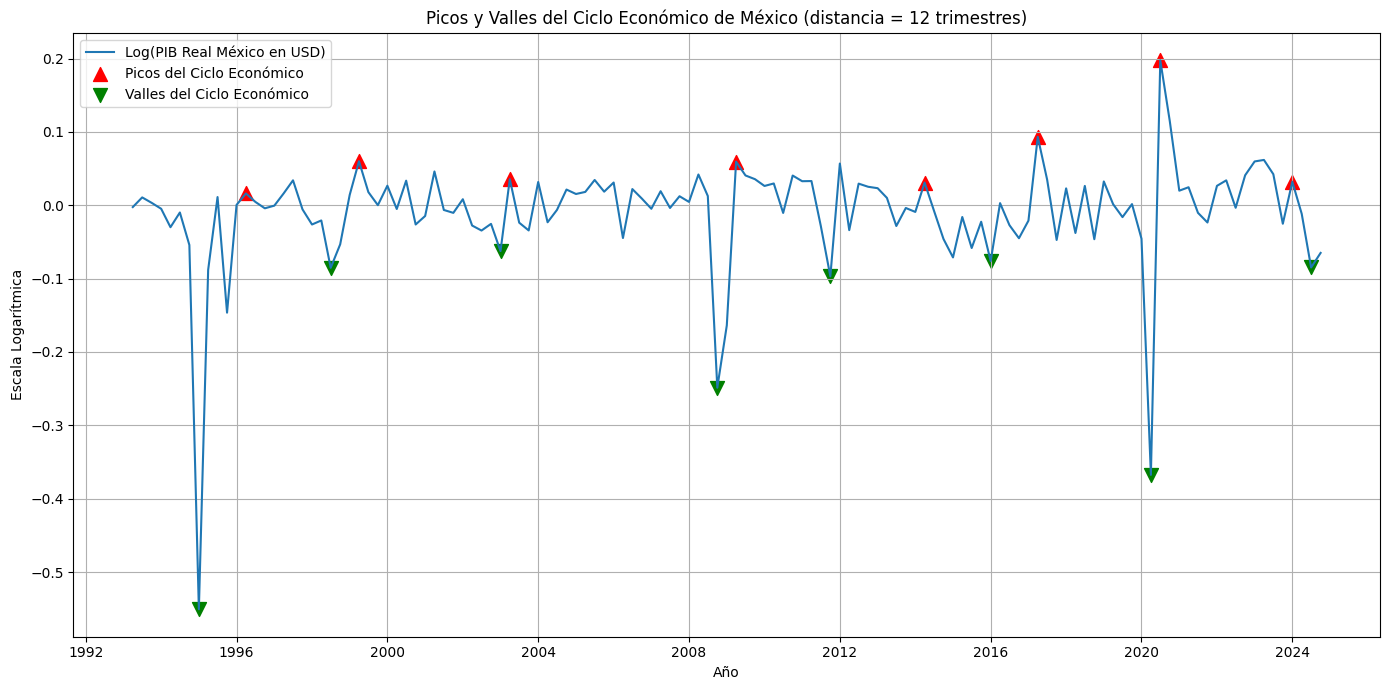

Número de picos locales detectados: 8
Número de valles locales detectados: 8


In [ ]:
# --- IDENTIFICACIÓN DE PICOS Y VALLES DEL CICLO ECONÓMICO ---

# Definir la distancia mínima entre picos/valles (en trimestres)
distancia_entre_picos = 12 # Equivalente a 3 años

# Encontrar los picos (máximos locales)
indices_picos, _ = find_peaks(serie_crecimiento, distance=distancia_entre_picos)
picos = serie_crecimiento.iloc[indices_picos]

# Encontrar los valles (mínimos locales), invirtiendo la serie
indices_valles, _ = find_peaks(-serie_crecimiento, distance=distancia_entre_picos)
valles = serie_crecimiento.iloc[indices_valles]

# Graficar los resultados
print("Generando gráfico de picos y valles del ciclo económico...")
plt.figure(figsize=(14, 7))

# Graficar la serie original
plt.plot(serie_crecimiento.index, serie_crecimiento, label='Log(PIB Real México en USD)')

# Marcar los picos en el gráfico
plt.scatter(picos.index, picos.values, color='red', marker='^', s=100, label='Picos del Ciclo Económico')

# Marcar los valles en el gráfico
plt.scatter(valles.index, valles.values, color='green', marker='v', s=100, label='Valles del Ciclo Económico')

# Añadir títulos y etiquetas
plt.title(f'Picos y Valles del Ciclo Económico de México (distancia = {distancia_entre_picos} trimestres)')
plt.xlabel('Año')
plt.ylabel('Escala Logarítmica')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Imprimir un resumen
print(f"Número de picos locales detectados: {len(picos)}")
print(f"Número de valles locales detectados: {len(valles)}")

#### Razones de Crecimiento Anual (Exploratorio)

Calculando el crecimiento/reducción anual...
Primeras filas del crecimiento anual:
    Año  Crecimiento (%)
0  1994        -9.398239
1  1995       -53.891252
2  1996         1.720597
3  1997         4.500732
4  1998       -16.924553


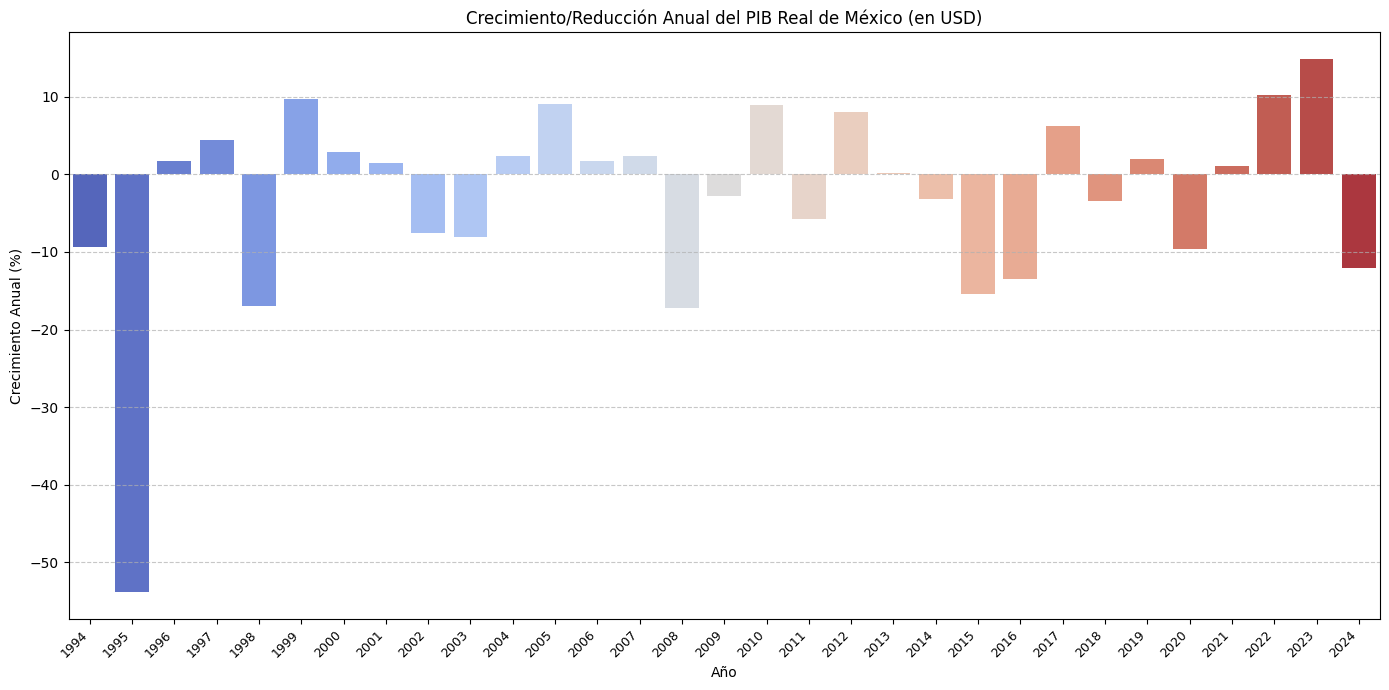

In [ ]:
# --- CÁLCULO Y VISUALIZACIÓN DEL CRECIMIENTO ANUAL ---

# 1. Seleccionar la serie de interés (valor del PIB en USD, no la tasa de crecimiento)
serie_anual = df_politica['pib_mx_usd']

print("Calculando el crecimiento/reducción anual...")

# 2. Agrupar por año y tomar el último valor de cada año
# Usamos el último dato trimestral como representativo del cierre del año.
valores_anuales = serie_anual.resample('A').last() # .resample('A') es más robusto que groupby(year)

# 3. Calcular el cambio porcentual año con año
crecimiento_anual = valores_anuales.pct_change() * 100

# 4. Preparar los datos para la visualización
crecimiento_anual_df = crecimiento_anual.dropna().reset_index()
crecimiento_anual_df.columns = ['Año', 'Crecimiento (%)']
# Extraemos solo el año para que el eje X sea más limpio
crecimiento_anual_df['Año'] = crecimiento_anual_df['Año'].dt.year

print("Primeras filas del crecimiento anual:")
print(crecimiento_anual_df.head())

# 5. Graficar los resultados como un diagrama de barras
plt.figure(figsize=(14, 7))
sns.barplot(data=crecimiento_anual_df, x='Año', y='Crecimiento (%)', palette='coolwarm')

# Ajustar las etiquetas del eje X para que no se solapen
plt.xticks(rotation=45, ha='right', fontsize=9)

# Añadir títulos y etiquetas
plt.title('Crecimiento/Reducción Anual del PIB Real de México (en USD)')
plt.xlabel('Año')
plt.ylabel('Crecimiento Anual (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar la frecuencia de los 'ticks' en el eje x para mayor claridad
ax = plt.gca()
n_years = len(crecimiento_anual_df['Año'])
# Muestra una etiqueta cada 'tick_spacing' años. Ajusta el divisor si es necesario.
tick_spacing = max(1, n_years // 25)
ax.set_xticks(ax.get_xticks()[::tick_spacing])

plt.tight_layout()
plt.show()

Barras Azules (Positivas): Representan los años en que el valor en dólares del PIB de México creció en comparación con el cierre del año anterior.

Barras Rojas (Negativas): Son los años de recesión o contracción. Indican que el valor en dólares del PIB fue menor que el del año anterior. Verás barras rojas muy grandes en años de crisis como 1995, 2009 y 2020.

La Altura de las Barras: La altura (o profundidad) de cada barra te muestra la magnitud del cambio. Una barra roja muy alta en 1995 te mostrará visualmente el devastador impacto de la crisis del Tequila en el valor de la economía medido en dólares.

### Serie elástica

#### Análisis de Tendencia (Media Móvil)

Generando gráfico de tendencia con media móvil...


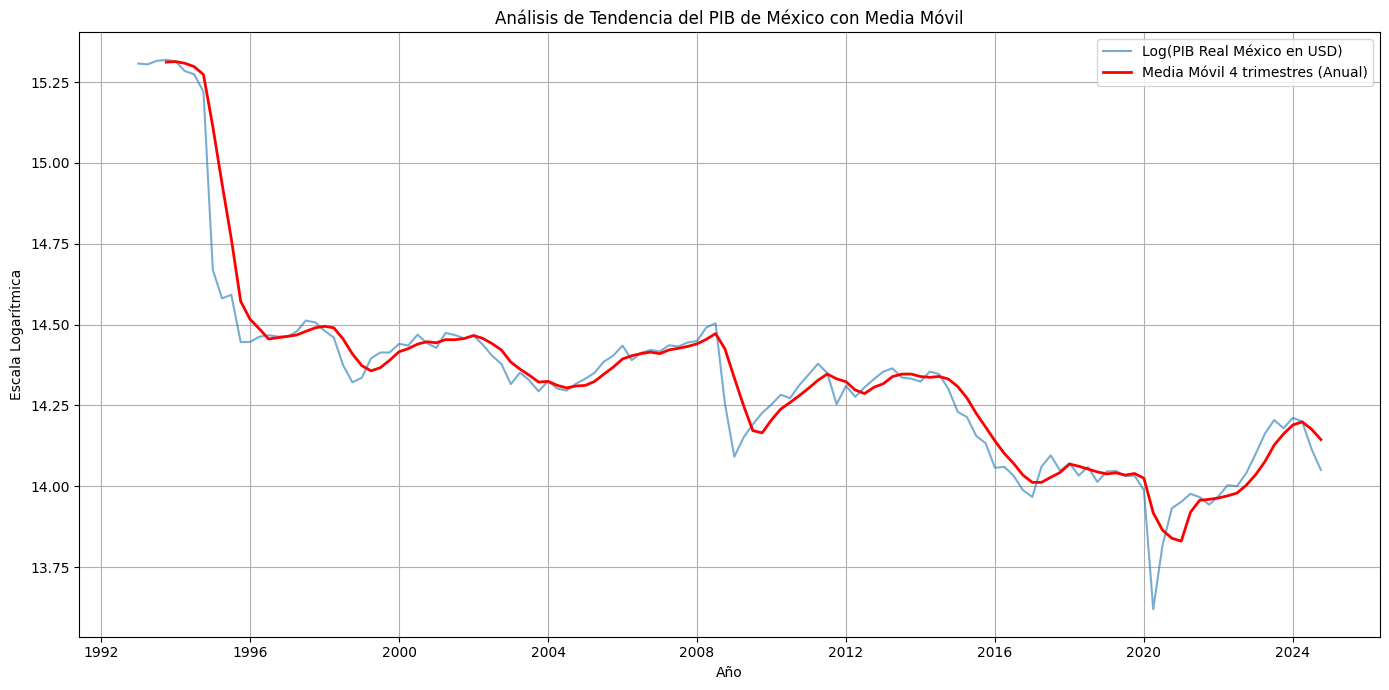

In [ ]:
# --- ANÁLISIS DE TENDENCIA CON MEDIA MÓVIL ANUAL ---

# 1. Seleccionar la serie de interés (la de niveles en logaritmos, no la de crecimiento)
serie_a_analizar = df_politica['log_pib_mx_usd'].dropna()

# 2. Definir la ventana móvil
# Usamos 4 porque nuestros datos son trimestrales (4 trimestres = 1 año)
ventana_movil = 4

# 3. Calcular la media móvil
serie_media_movil = serie_a_analizar.rolling(window=ventana_movil).mean()

# 4. Graficar ambas series
print("Generando gráfico de tendencia con media móvil...")
plt.figure(figsize=(14, 7))

# Graficar la serie original con un poco de transparencia
plt.plot(serie_a_analizar.index, serie_a_analizar, alpha=0.6, label='Log(PIB Real México en USD)')

# Graficar la media móvil con una línea más gruesa y de otro color
plt.plot(serie_media_movil.index, serie_media_movil, color='red', linewidth=2, label=f'Media Móvil {ventana_movil} trimestres (Anual)')

# Añadir títulos y etiquetas adecuados
plt.title('Análisis de Tendencia del PIB de México con Media Móvil')
plt.xlabel('Año')
plt.ylabel('Escala Logarítmica')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Picos y Valles Locales (Exploratorio)

Generando gráfico de picos y valles del ciclo económico...


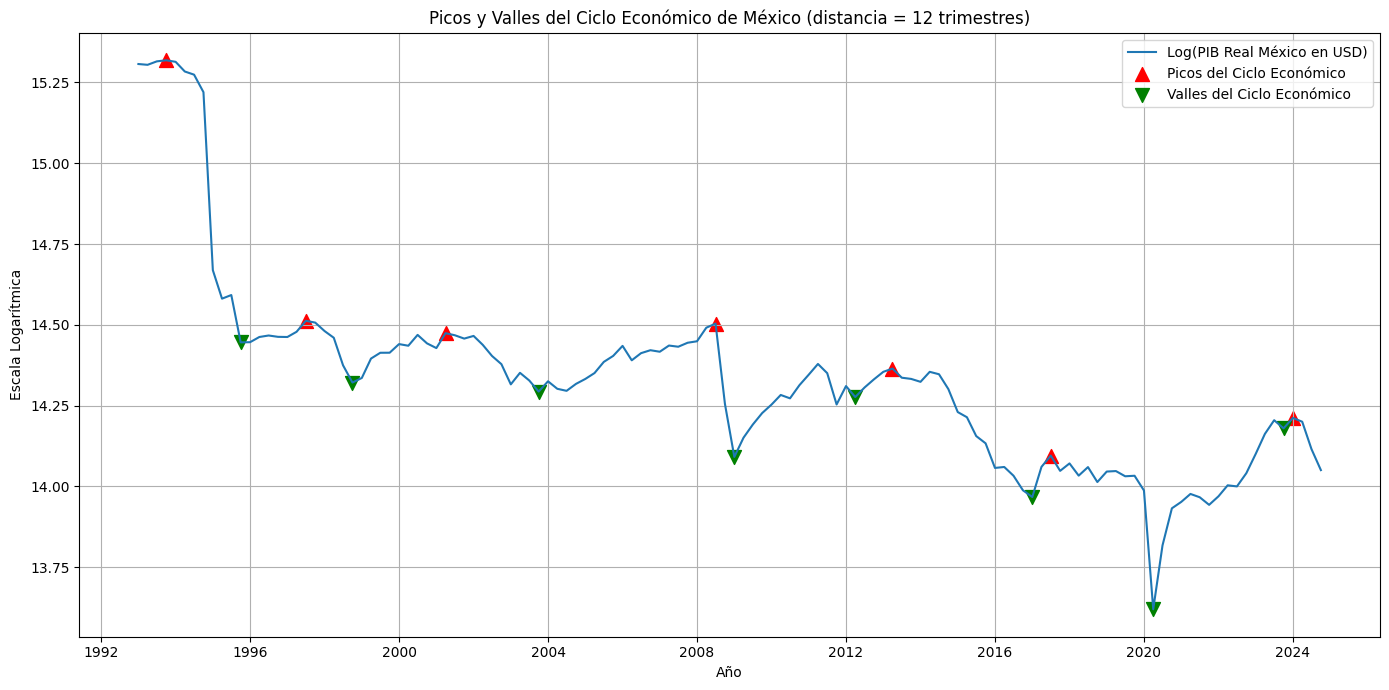

Número de picos locales detectados: 7
Número de valles locales detectados: 8


In [ ]:
# --- IDENTIFICACIÓN DE PICOS Y VALLES DEL CICLO ECONÓMICO ---

# 1. Seleccionar la serie de interés
serie_ciclos = df_politica['log_pib_mx_usd'].dropna()

# 2. Definir la distancia mínima entre picos/valles (en trimestres)
distancia_entre_picos = 12 # Equivalente a 3 años

# 3. Encontrar los picos (máximos locales)
indices_picos, _ = find_peaks(serie_ciclos, distance=distancia_entre_picos)
picos = serie_ciclos.iloc[indices_picos]

# 4. Encontrar los valles (mínimos locales), invirtiendo la serie
indices_valles, _ = find_peaks(-serie_ciclos, distance=distancia_entre_picos)
valles = serie_ciclos.iloc[indices_valles]

# 5. Graficar los resultados
print("Generando gráfico de picos y valles del ciclo económico...")
plt.figure(figsize=(14, 7))

# Graficar la serie original
plt.plot(serie_ciclos.index, serie_ciclos, label='Log(PIB Real México en USD)')

# Marcar los picos en el gráfico
plt.scatter(picos.index, picos.values, color='red', marker='^', s=100, label='Picos del Ciclo Económico')

# Marcar los valles en el gráfico
plt.scatter(valles.index, valles.values, color='green', marker='v', s=100, label='Valles del Ciclo Económico')

# Añadir títulos y etiquetas
plt.title(f'Picos y Valles del Ciclo Económico de México (distancia = {distancia_entre_picos} trimestres)')
plt.xlabel('Año')
plt.ylabel('Escala Logarítmica')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Imprimir un resumen
print(f"Número de picos locales detectados: {len(picos)}")
print(f"Número de valles locales detectados: {len(valles)}")

## Metodología Box-Jenkins

### Identificación del Modelo

El objetivo aquí es encontrar el modelo ARIMA(p, d, q) más apropiado. Como ya hemos diferenciado los logaritmos para obtener las tasas de crecimiento, estamos trabajando con una serie que probablemente ya es estacionaria. Por lo tanto, el orden de diferenciación d que necesitaremos aplicar a esta serie de crecimiento será 0.

Nuestro objetivo es encontrar los órdenes p (autorregresivo) y q (media móvil).

#### Preparar la Serie y Verificar Estacionariedad

Uusamos una prueba estadística formal como la Prueba Aumentada de Dickey-Fuller (ADF) para confirmar que es estacionaria.

Hipótesis Nula (H0): La serie tiene una raíz unitaria (no es estacionaria).

Hipótesis Alternativa (Ha): La serie no tiene una raíz unitaria (es estacionaria).

Si el p-valor es menor a 0.05, rechazamos la hipótesis nula.

In [ ]:
# Seleccionar la serie de crecimiento del PIB de México y eliminar el primer valor NaN
serie_crecimiento_mx = df_politica['crecimiento_pib_mx_usd'].dropna()

# Realizar la prueba ADF
resultado_adf = adfuller(serie_crecimiento_mx)
print('--- Prueba Aumentada de Dickey-Fuller (ADF) ---')
print(f'Estadístico ADF: {resultado_adf[0]}')
print(f'p-valor: {resultado_adf[1]}')

if resultado_adf[1] <= 0.05:
    print("Conclusión: El p-valor es menor o igual a 0.05. Se rechaza la hipótesis nula. La serie es estacionaria.")
    print("El orden de diferenciación (d) para el modelo ARIMA será 0.")
else:
    print("Conclusión: El p-valor es mayor a 0.05. No se rechaza la hipótesis nula. La serie no es estacionaria.")

--- Prueba Aumentada de Dickey-Fuller (ADF) ---
Estadístico ADF: -8.002700781844236
p-valor: 2.3110629485815235e-12
Conclusión: El p-valor es menor o igual a 0.05. Se rechaza la hipótesis nula. La serie es estacionaria.
El orden de diferenciación (d) para el modelo ARIMA será 0.


#### Analizar Gráficos ACF y PACF

Estos gráficos son nuestra herramienta principal para elegir los órdenes p y q.

ACF (Función de Autocorrelación): Nos ayuda a identificar el orden q (MA).
PACF (Función de Autocorrelación Parcial): Nos ayuda a identificar el orden p (AR).

##### Para el crecimiento

Función de Autocorrelación (ACF):


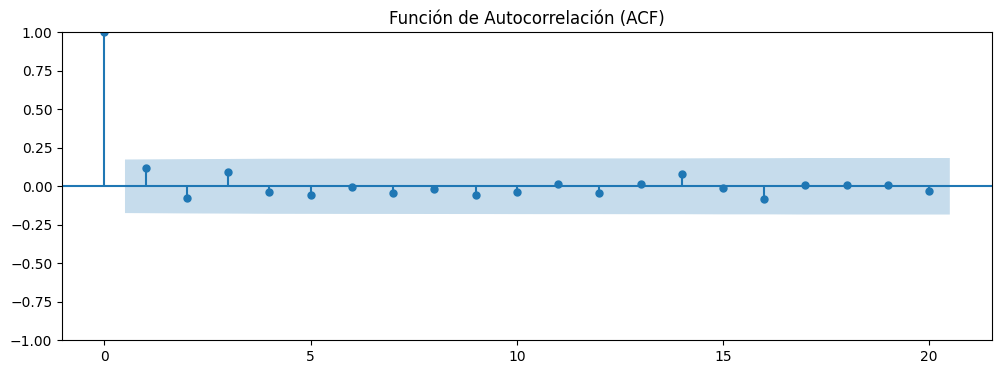


Función de Autocorrelación Parcial (PACF):


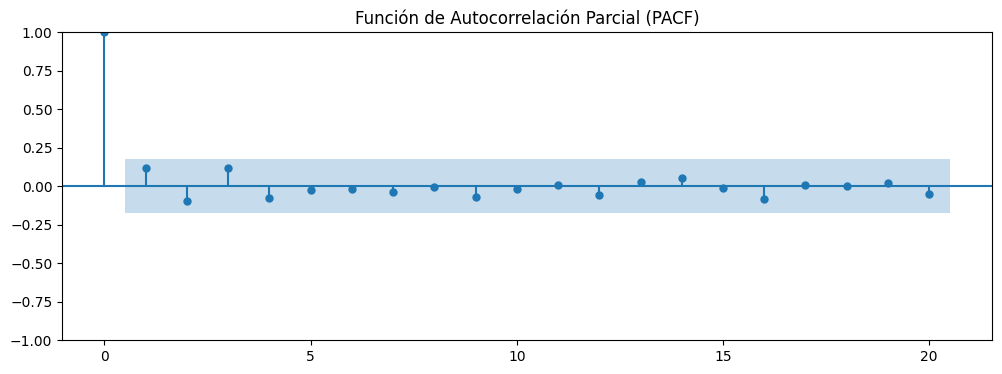

In [ ]:
# --- Gráfico de Autocorrelación (ACF) ---
print("Función de Autocorrelación (ACF):")
fig_acf = plt.figure(figsize=(12, 4))
ax_acf = fig_acf.add_subplot(111)
plot_acf(serie_crecimiento_mx, ax=ax_acf, lags=20)
plt.title('Función de Autocorrelación (ACF)')
plt.show()


# --- Gráfico de Autocorrelación Parcial (PACF) - CORREGIDO ---
print("\nFunción de Autocorrelación Parcial (PACF):")
fig_pacf = plt.figure(figsize=(12, 4))
ax_pacf = fig_pacf.add_subplot(111)

# La corrección clave: Forzamos el método a 'ols' (Ordinary Least Squares)
# para asegurar un cálculo robusto y diferente al de la ACF.
plot_pacf(serie_crecimiento_mx, ax=ax_pacf, lags=20, method='ols')

plt.title('Función de Autocorrelación Parcial (PACF)')
plt.show()

Cómo interpretar los gráficos:

Para p (orden AR): Mira el gráfico PACF. Cuenta cuántos rezagos (barras azules) se salen del área sombreada azul antes de cortarse abruptamente y caer dentro del área. Si, por ejemplo, solo el primer rezago es significativo, esto sugiere un modelo AR(1), es decir, p=1.

Para q (orden MA): Mira el gráfico ACF. De manera similar, cuenta cuántos rezagos son significativos antes de cortarse. Si el primer rezago es significativo, esto sugiere un modelo MA(1), es decir, q=1.

El hecho de que el crecimiento tenga una memoria corta no es un problema; es la característica que explica por qué el nivel del PIB tiene una tendencia y una memoria larga. El comportamiento de los gráficos aplicados al crecimiento se conoce en econometría como un proceso de "raíz unitaria" o "caminata aleatoria", y es la propiedad fundamental de la mayoría de las series macroeconómicas.

##### Para el PIB real

Este gráfico está aplicado a la versión elástica del PIB real, por lo que aquí si se puede ver correlación histórica.


--- Gráficos ACF y PACF ---


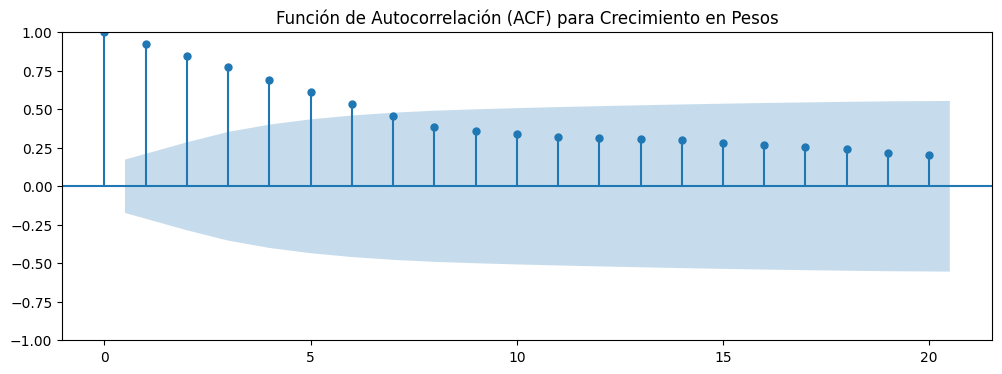

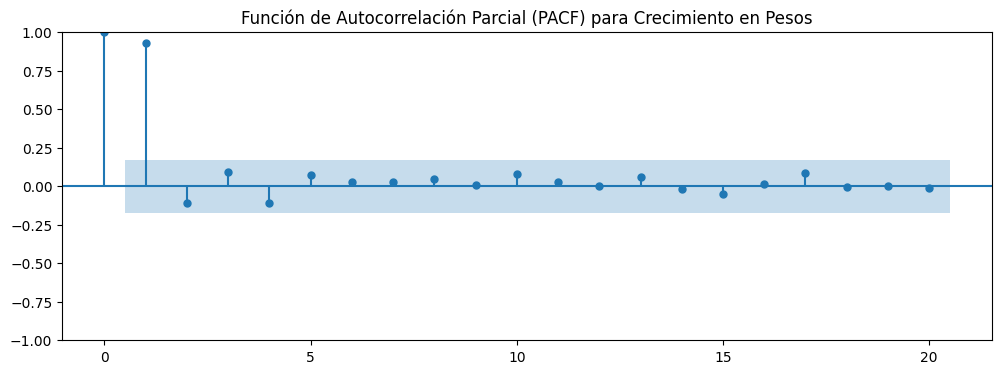

In [ ]:
serie_crecimiento_real_mx = df_politica['log_pib_mx_usd'].dropna()
# Graficar ACF y PACF para identificar p y q
print("\n--- Gráficos ACF y PACF ---")
# ACF
fig_acf = plt.figure(figsize=(12, 4))
ax_acf = fig_acf.add_subplot(111)
plot_acf(serie_crecimiento_real_mx, ax=ax_acf, lags=20)
plt.title('Función de Autocorrelación (ACF) para Crecimiento en Pesos')
plt.show()

# PACF
fig_pacf = plt.figure(figsize=(12, 4))
ax_pacf = fig_pacf.add_subplot(111)
plot_pacf(serie_crecimiento_real_mx, ax=ax_pacf, lags=20, method='ols')
plt.title('Función de Autocorrelación Parcial (PACF) para Crecimiento en Pesos')
plt.show()

#### Periodograma y Transformada discreta de fourier

Generando gráfico de descomposición con filtros de Fourier...


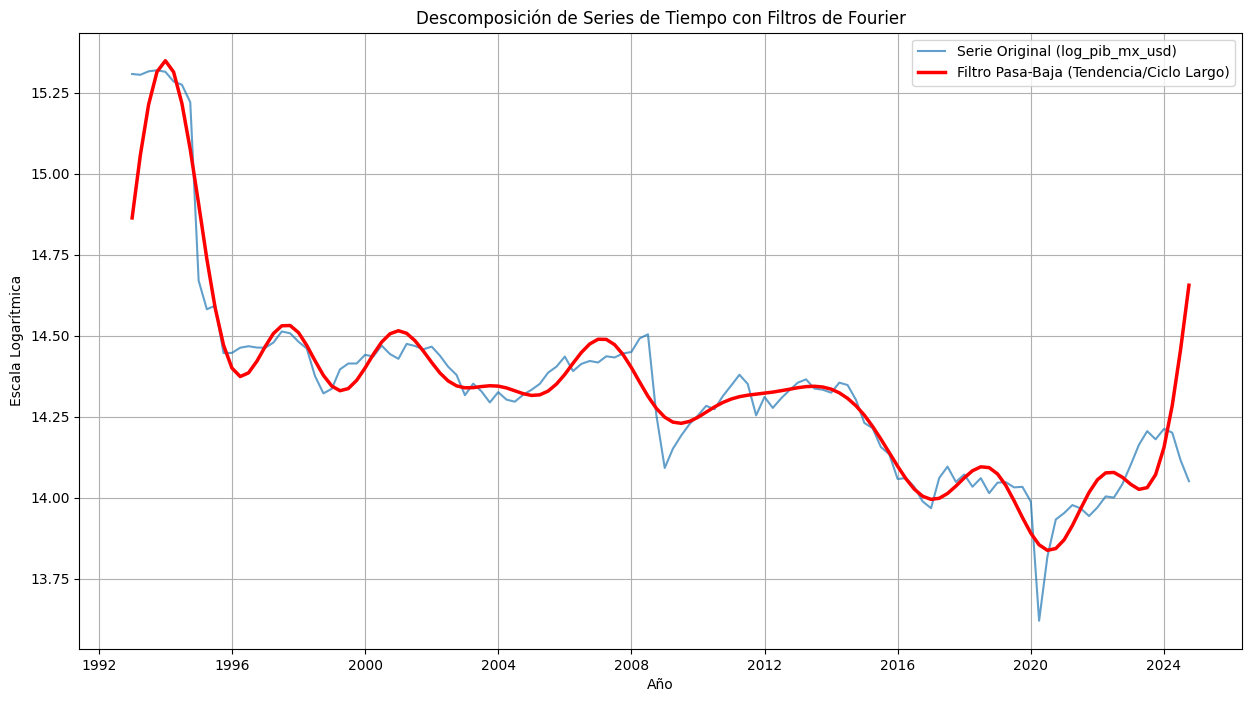

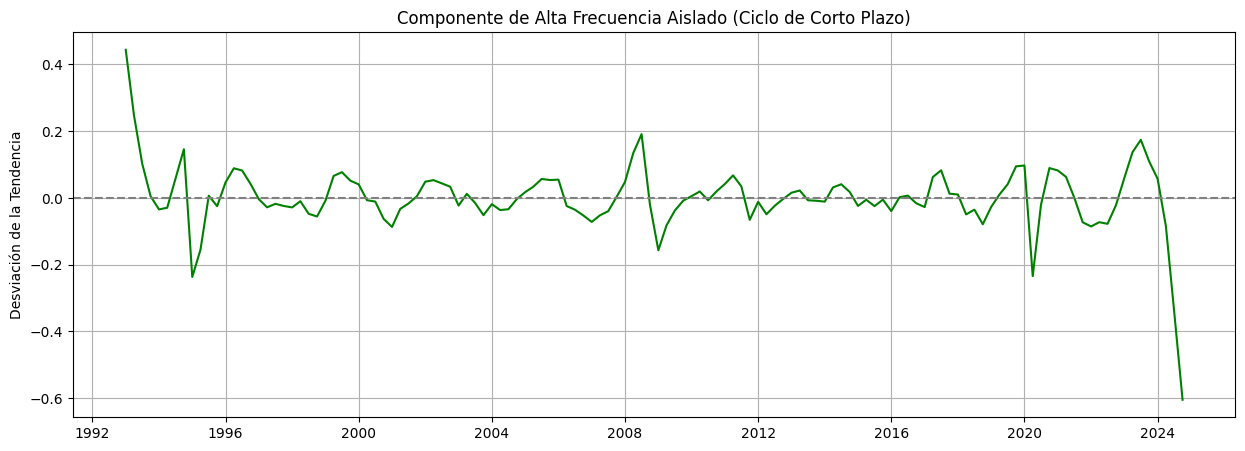

In [ ]:
# --- APLICACIÓN DE FILTROS PASA-BAJA Y PASA-ALTA ---

# 1. Seleccionar la serie de nivel para el análisis
serie_original = df_politica['log_pib_mx_usd'].dropna()
N = len(serie_original) # Número de puntos de datos

# 2. Calcular la Transformada de Fourier (DFT)
# Esto nos lleva del dominio del tiempo al de la frecuencia
transformada_fft = fft(serie_original.values)
# fftfreq nos da las frecuencias correspondientes a los resultados de fft
# La frecuencia de muestreo es 4 (trimestral), el periodo es 1/4 = 0.25
frecuencias = fftfreq(N, d=1/4)


# 3. Aplicar el Filtro Pasa-Baja (Extraer la Tendencia)
# ------------------------------------------------------------------
# Copiamos la transformada para no modificar la original
fft_filtrada_baja = transformada_fft.copy()

# Definimos una frecuencia de corte.
# Queremos eliminar ciclos que duren menos de, por ejemplo, 3 años.
# Periodo de corte = 3 años => Frecuencia de corte = 1/3 = 0.33 ciclos/año
frecuencia_corte = 0.33

# Ponemos a cero las frecuencias que son MÁS ALTAS que la frecuencia de corte
# abs(frecuencias) > frecuencia_corte crea una máscara booleana
fft_filtrada_baja[np.abs(frecuencias) > frecuencia_corte] = 0

# Invertir la transformada para volver al dominio del tiempo
serie_filtrada_baja = ifft(fft_filtrada_baja)


# 4. Aplicar el Filtro Pasa-Alta (Extraer el Ruido/Ciclo Corto)
# ------------------------------------------------------------------
# Copiamos la transformada de nuevo
fft_filtrada_alta = transformada_fft.copy()

# Ponemos a cero las frecuencias que son MÁS BAJAS que la frecuencia de corte
fft_filtrada_alta[np.abs(frecuencias) < frecuencia_corte] = 0

# Invertir la transformada para volver al dominio del tiempo
serie_filtrada_alta = ifft(fft_filtrada_alta)


# 5. Visualizar los resultados
# ------------------------------------------------------------------
print("Generando gráfico de descomposición con filtros de Fourier...")
plt.figure(figsize=(15, 8))

# Graficar la serie original
plt.plot(serie_original.index, serie_original, label='Serie Original (log_pib_mx_usd)', alpha=0.7)

# Graficar el componente de baja frecuencia (la tendencia)
plt.plot(serie_original.index, serie_filtrada_baja.real, color='red', linewidth=2.5, label='Filtro Pasa-Baja (Tendencia/Ciclo Largo)')

# Graficar el componente de alta frecuencia (el ciclo corto)
# Le sumamos la media de la serie original para que no fluctúe en cero y sea comparable visualmente

plt.title('Descomposición de Series de Tiempo con Filtros de Fourier')
plt.xlabel('Año')
plt.ylabel('Escala Logarítmica')
plt.legend()
plt.grid(True)
plt.show()

# Graficamos el componente de alta frecuencia por separado para ver su naturaleza estacionaria
plt.figure(figsize=(15, 5))
plt.plot(serie_original.index, serie_filtrada_alta.real, color='green')
plt.axhline(y=0, color='grey', linestyle='--')
plt.title('Componente de Alta Frecuencia Aislado (Ciclo de Corto Plazo)')
plt.ylabel('Desviación de la Tendencia')
plt.grid(True)
plt.show()

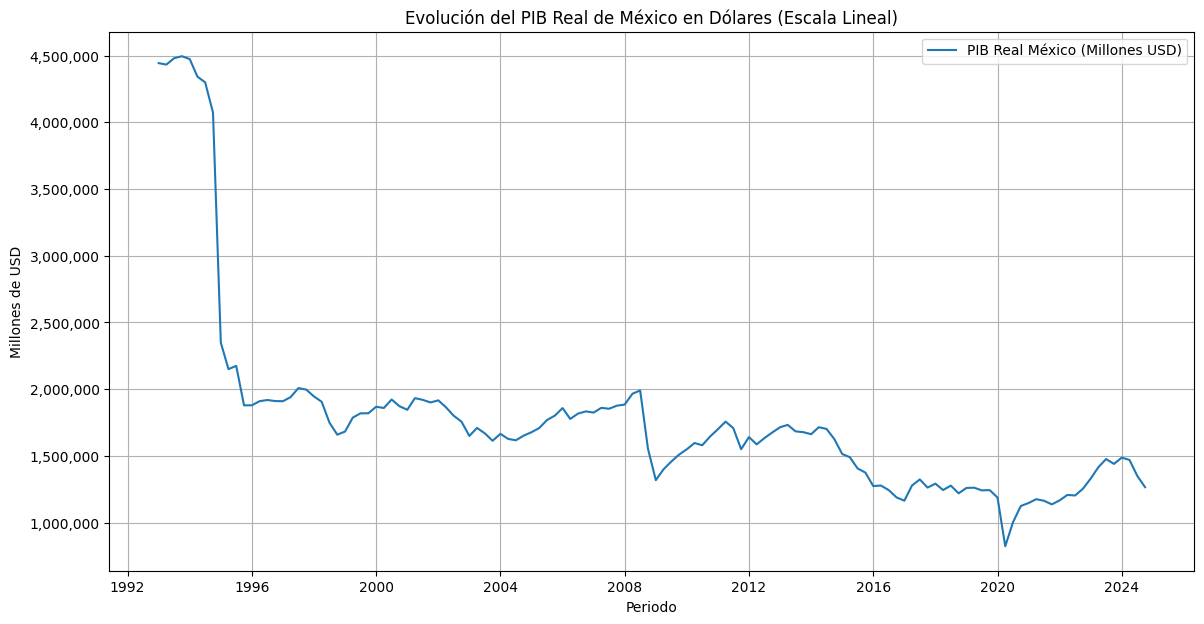

In [ ]:
# --- Graficar la Evolución del PIB de México en Dólares (Escala Lineal) ---

# Crear la figura y los ejes para el gráfico
plt.figure(figsize=(14, 7))

# Graficar únicamente la serie de México en Millones de USD
plt.plot(df_politica.index, df_politica['pib_mx_usd'], label='PIB Real México (Millones USD)')

# Añadir títulos y etiquetas
plt.title('Evolución del PIB Real de México en Dólares (Escala Lineal)')
plt.xlabel('Periodo')
plt.ylabel('Millones de USD')
plt.legend()
plt.grid(True)

# Formatear el eje Y para que los números grandes sean más legibles
from matplotlib.ticker import FuncFormatter
def millions_formatter(x, pos):
    return f'{int(x):,}'
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Mostrar el gráfico
plt.show()

Generando el Periodograma para detectar ciclos...


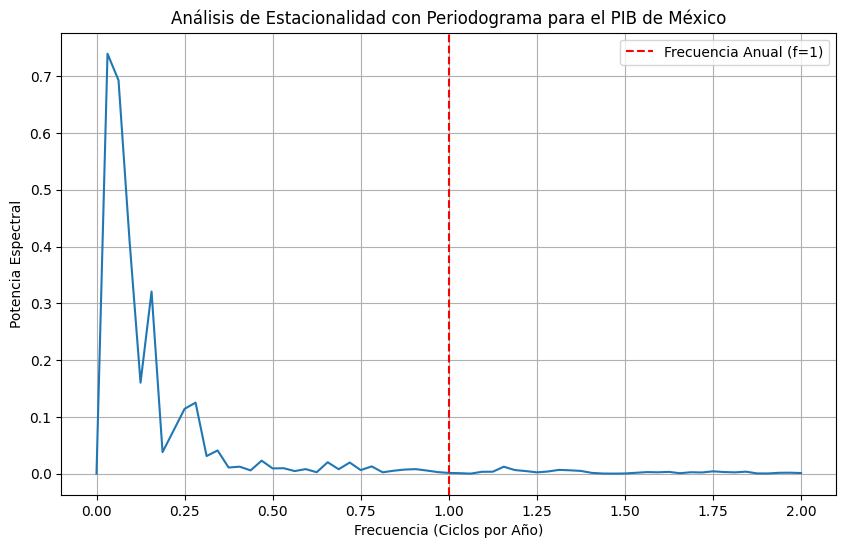


La frecuencia dominante es: 0.03 ciclos por año.
Esto corresponde a un periodo de: 32.00 años (o 128.00 trimestres).


In [ ]:
# --- ANÁLISIS DE ESTACIONALIDAD CON PERIODOGRAMA ---

# 1. Seleccionar la serie de nivel para analizar
# Usamos la serie en logaritmos y en dólares.
serie_para_ciclos = df_politica['log_pib_mx_usd'].dropna()

# 2. Definir la frecuencia de muestreo (¡Paso Crucial!)
# Como tus datos son trimestrales, tienes 4 datos por año.
frecuencia_muestreo = 4 # Datos por año

# 3. Calcular el Periodograma
# La función devuelve las frecuencias y la potencia espectral para cada una.
frecuencias, potencias = periodogram(serie_para_ciclos, fs=frecuencia_muestreo)

# 4. Graficar el Periodograma
print("Generando el Periodograma para detectar ciclos...")
plt.figure(figsize=(10, 6))
plt.plot(frecuencias, potencias)
plt.title('Análisis de Estacionalidad con Periodograma para el PIB de México')
plt.xlabel('Frecuencia (Ciclos por Año)')
plt.ylabel('Potencia Espectral')
plt.grid(True)
# Marcamos la frecuencia de 1 ciclo/año, que es la más común
plt.axvline(x=1, color='red', linestyle='--', linewidth=1.5, label='Frecuencia Anual (f=1)')
plt.legend()
plt.show()

# Encontrar la frecuencia con la mayor potencia
frecuencia_pico = frecuencias[np.argmax(potencias)]
periodo_dominante = 1 / frecuencia_pico
print(f"\nLa frecuencia dominante es: {frecuencia_pico:.2f} ciclos por año.")
print(f"Esto corresponde a un periodo de: {periodo_dominante:.2f} años (o {periodo_dominante*4:.2f} trimestres).")


--- Análisis de Estacionalidad con Periodograma ---


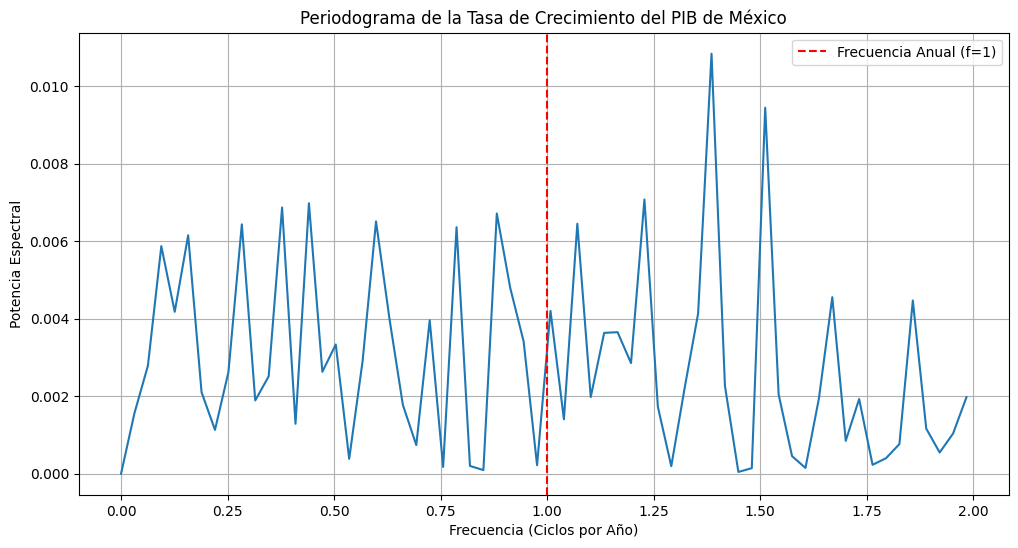


La frecuencia dominante en la serie es: 1.3858 ciclos por año.
Esto corresponde a un ciclo que se repite cada 0.72 años (o 2.89 trimestres).


In [ ]:
### Análisis de Estacionalidad con Periodograma

print("\n--- Análisis de Estacionalidad con Periodograma ---")

# Seleccionamos la serie estacionaria que ya creamos y limpiamos de NaNs
# Es la misma que usamos para la prueba ADF
serie_estacionaria = df_politica['crecimiento_pib_mx_usd'].dropna()

# --- Definir la Frecuencia de Muestreo (Paso Crucial) ---
# Nuestros datos son trimestrales, lo que significa que tenemos 4 puntos de datos por año.
# Por lo tanto, nuestra frecuencia de muestreo (fs) es 4.
fs = 4

# --- Calcular el Periodograma ---
# Esta función aplica la Transformada de Fourier y nos devuelve las frecuencias y su potencia
frecuencias, potencias = periodogram(serie_estacionaria, fs=fs)

# --- Graficar el Periodograma ---
plt.figure(figsize=(12, 6))
plt.plot(frecuencias, potencias)

# Añadir elementos para una mejor interpretación
plt.title('Periodograma de la Tasa de Crecimiento del PIB de México')
plt.xlabel('Frecuencia (Ciclos por Año)')
plt.ylabel('Potencia Espectral')
plt.grid(True)

# Marcar con una línea roja la frecuencia de 1 ciclo/año, que es la estacionalidad anual
plt.axvline(x=1, color='red', linestyle='--', linewidth=1.5, label='Frecuencia Anual (f=1)')
plt.legend()
plt.show()

# --- Interpretar el resultado cuantitativamente ---
# Encontrar la frecuencia con la mayor potencia (el pico más alto)
frecuencia_pico = frecuencias[np.argmax(potencias)]
periodo_pico = 1 / frecuencia_pico if frecuencia_pico > 0 else float('inf')

print(f"\nLa frecuencia dominante en la serie es: {frecuencia_pico:.4f} ciclos por año.")
print(f"Esto corresponde a un ciclo que se repite cada {periodo_pico:.2f} años (o {periodo_pico * 4:.2f} trimestres).")

### Estimación del Modelo

#### ARIMA crecimiento

In [ ]:
# Definimos los modelos candidatos que vamos a probar
modelos_a_probar = {
    "ARIMA(1,0,0)": (1, 0, 0),
    "ARIMA(0,0,1)": (0, 0, 1),
    "ARIMA(1,0,1)": (1, 0, 1)
}

# Lista para guardar los resultados
resultados = []

print("--- Ajustando y comparando modelos candidatos ---")

# Bucle para ajustar cada modelo y guardar sus criterios de información
for nombre_modelo, orden in modelos_a_probar.items():
    try:
        # Ajustar el modelo
        modelo = ARIMA(serie_crecimiento_mx, order=orden).fit()
        # Guardar resultados
        resultados.append({
            "Modelo": nombre_modelo,
            "AIC": modelo.aic,
            "BIC": modelo.bic,
            "Log-Likelihood": modelo.llf
        })
    except Exception as e:
        print(f"No se pudo ajustar el modelo {nombre_modelo}: {e}")

# Crear un DataFrame con los resultados y ordenarlo por AIC
df_resultados = pd.DataFrame(resultados).sort_values(by='AIC')

print("\n--- Tabla Comparativa de Modelos ---")
print(df_resultados)

# Encontrar el mejor modelo según AIC
mejor_modelo_aic = df_resultados.loc[df_resultados['AIC'].idxmin()]
print(f"\nEl mejor modelo según el criterio AIC es: {mejor_modelo_aic['Modelo']}")

--- Ajustando y comparando modelos candidatos ---

--- Tabla Comparativa de Modelos ---
         Modelo         AIC         BIC  Log-Likelihood
2  ARIMA(1,0,1) -289.179556 -277.802808      148.589778
1  ARIMA(0,0,1) -289.086923 -280.554362      147.543462
0  ARIMA(1,0,0) -288.636256 -280.103695      147.318128

El mejor modelo según el criterio AIC es: ARIMA(1,0,1)


#### ARIMA Elasticidad PIB

In [ ]:
# Estimación y Comparación de Modelos Candidatos
modelos_a_probar = {
    "ARIMA(1,0,0)": (1, 0, 0),
    "ARIMA(0,0,1)": (0, 0, 1),
    "ARIMA(1,0,1)": (1, 0, 1)
}

resultados = []
print("\n--- Etapa 2: Ajustando y comparando modelos candidatos ---")

for nombre_modelo, orden in modelos_a_probar.items():
    try:
        modelo = ARIMA(serie_crecimiento_real_mx, order=orden).fit()
        resultados.append({
            "Modelo": nombre_modelo,
            "AIC": modelo.aic,
            "BIC": modelo.bic
        })
    except Exception as e:
        print(f"No se pudo ajustar el modelo {nombre_modelo}: {e}")

df_resultados_real = pd.DataFrame(resultados).sort_values(by='AIC')

print("\n--- Tabla Comparativa de Modelos para Crecimiento en Pesos ---")
print(df_resultados_real)

if not df_resultados_real.empty:
    mejor_modelo_aic_real = df_resultados_real.loc[df_resultados_real['AIC'].idxmin()]
    print(f"\nEl mejor modelo según el criterio AIC es: {mejor_modelo_aic_real['Modelo']}")
else:
    print("\nNo se pudieron ajustar los modelos.")


--- Etapa 2: Ajustando y comparando modelos candidatos ---

--- Tabla Comparativa de Modelos para Crecimiento en Pesos ---
         Modelo         AIC         BIC
2  ARIMA(1,0,1) -284.859544 -273.451423
0  ARIMA(1,0,0) -283.730983 -275.174892
1  ARIMA(0,0,1)  -73.774651  -65.218561

El mejor modelo según el criterio AIC es: ARIMA(1,0,1)
